In [2]:
import pandas as pd
df = pd.read_excel('word_count_test_outputs.xlsx')
df.columns

Index(['Model', 'Word Count', 'Sampling', 'Recall Range', 'Recall Min',
       'Precision Min', 'CI Min', 'CI Max', 'Accuracy',
       'Training Time (Seconds)', 'Prediction Time (Seconds)',
       '"Recall Range" Min', '"Recall Min" Max', '"Precision Min" Max',
       '"CI Min" Max', '"CI Max" Max', '"Accuracy" Max', '"Training Time" Min',
       '"Prediction Time" Min'],
      dtype='object')

In [3]:
import matplotlib.pyplot as plt
df = df.loc[df['Sampling'] == 'NS']
df = df[['Model', 'Word Count', '"Recall Range" Min', '"Recall Min" Max', '"Precision Min" Max', '"CI Min" Max', '"CI Max" Max', '"Accuracy" Max', '"Training Time" Min', '"Prediction Time" Min']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 195
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model                  66 non-null     object 
 1   Word Count             66 non-null     int64  
 2   "Recall Range" Min     66 non-null     float64
 3   "Recall Min" Max       66 non-null     float64
 4   "Precision Min" Max    66 non-null     float64
 5   "CI Min" Max           66 non-null     float64
 6   "CI Max" Max           66 non-null     float64
 7   "Accuracy" Max         66 non-null     float64
 8   "Training Time" Min    66 non-null     float64
 9   "Prediction Time" Min  66 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.7+ KB


In [4]:
df['Model'].unique()

array(['CT', 'MLP', 'MLR', 'MNB', 'RF', 'SVM'], dtype=object)

In [5]:
ct = df.loc[df['Model'] == 'CT']
ct = ct.set_index('Word Count')

mlp = df.loc[df['Model'] == 'MLP']
mlp = mlp.set_index('Word Count')

mlr = df.loc[df['Model'] == 'MLR']
mlr = mlr.set_index('Word Count')

mnb = df.loc[df['Model'] == 'MNB']
mnb = mnb.set_index('Word Count')

rf = df.loc[df['Model'] == 'RF']
rf = rf.set_index('Word Count')

svm = df.loc[df['Model'] == 'SVM']
svm = svm.set_index('Word Count')

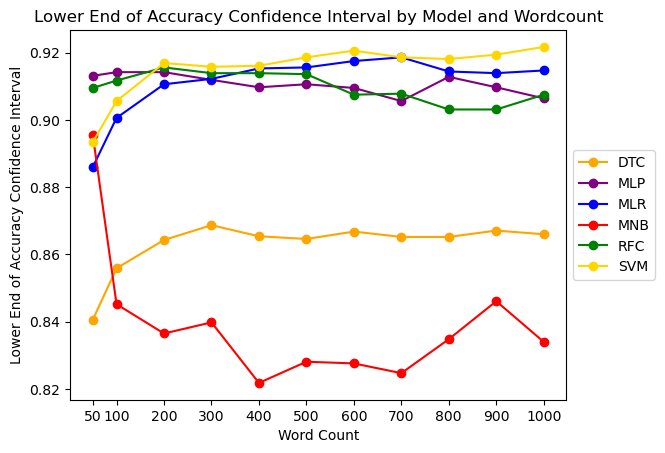

In [16]:
import matplotlib.ticker as ticker
plt.plot(ct['"CI Min" Max'], '-o', label = "DTC", color='orange') 
plt.plot(mlp['"CI Min" Max'], '-o', label = "MLP", color='purple') 
plt.plot(mlr['"CI Min" Max'], '-o', label = "MLR", color='blue') 
plt.plot(mnb['"CI Min" Max'], '-o', label = "MNB", color='red') 
plt.plot(rf['"CI Min" Max'], '-o', label = "RFC", color='green') 
plt.plot(svm['"CI Min" Max'], '-o', label = "SVM", color='gold')  
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Lower End of Accuracy Confidence Interval by Model and Wordcount')
plt.xlabel('Word Count')
plt.ylabel('Lower End of Accuracy Confidence Interval')
plt.xticks([50,100,200,300,400,500,600,700,800,900,1000])
plt.show()

In [7]:
count_50 = df.loc[df['Word Count'] == 50]

count_100 = df.loc[df['Word Count'] == 100]

count_200 = df.loc[df['Word Count'] == 200]

count_300 = df.loc[df['Word Count'] == 300]

count_400 = df.loc[df['Word Count'] == 400]

count_500 = df.loc[df['Word Count'] == 500]

count_600 = df.loc[df['Word Count'] == 600]

count_700 = df.loc[df['Word Count'] == 700]

count_800 = df.loc[df['Word Count'] == 800]

count_900 = df.loc[df['Word Count'] == 900]

count_1000 = df.loc[df['Word Count'] == 1000]

In [8]:
counts = [count_50['"CI Min" Max'],count_100['"CI Min" Max'],count_200['"CI Min" Max'],count_300['"CI Min" Max'],count_400['"CI Min" Max'],count_500['"CI Min" Max'],count_600['"CI Min" Max'],count_700['"CI Min" Max'],count_800['"CI Min" Max'],count_900['"CI Min" Max'],count_1000['"CI Min" Max']]
for i in counts:
    print(f'Mean: {i.mean()}')

Mean: 0.8896666666666665
Mean: 0.8888666666666666
Mean: 0.8930166666666667
Mean: 0.8937166666666667
Mean: 0.8903666666666666
Mean: 0.8918499999999999
Mean: 0.8915833333333333
Mean: 0.8900833333333332
Mean: 0.8914
Mean: 0.8932166666666665
Mean: 0.8917166666666668


In [9]:
means = {'wrd_cnt':[50,100,200,300,400,500,600,700,800,900,1000],
        'mean_lower_ci':[0.8897,0.8889,0.893,0.8937,0.8904,0.8918,0.8916,0.8901,0.8914,0.8932,0.8917]}

In [10]:
means = pd.DataFrame(data=means)

In [11]:
means = means.set_index('wrd_cnt')

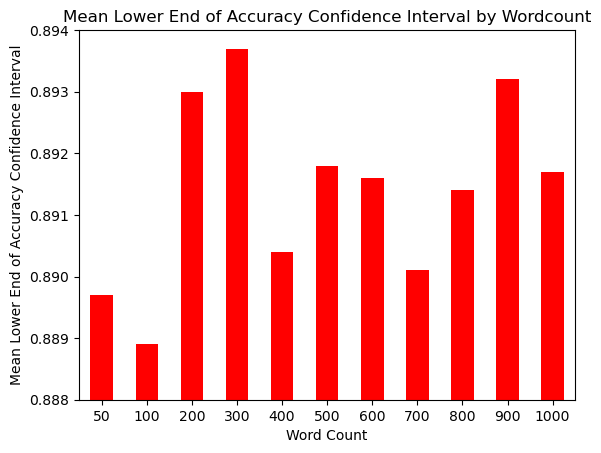

In [21]:
ax = means.plot(kind='bar',
                title = 'Mean Lower End of Accuracy Confidence Interval by Wordcount',
                xlabel = 'Word Count', ylabel = 'Mean Lower End of Accuracy Confidence Interval',
                color='red', legend=False)
plt.ylim(0.888,0.894)
plt.xticks(rotation=0)
plt.show()